<a href="https://colab.research.google.com/github/Monisha09-ds/-/blob/main/TimeSeries(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('/content/Main dataset.csv')
df.head()

,Datetime,St(kVA)_update
0,2/4/2023 0:00,62.3632
1,2/4/2023 0:01,61.7152
2,2/4/2023 0:02,61.6672
3,2/4/2023 0:03,61.4176
4,2/4/2023 0:04,61.5136


In [3]:
df2 = df.reset_index()['St(kVA)_update']

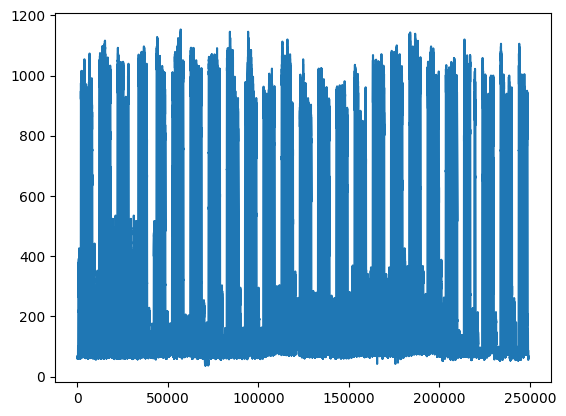

In [4]:
plt.plot(df2)

In [5]:
import  numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [6]:
tr_size = int(len(df2)*0.70)
te_size = len(df2)-tr_size
tr_df,te_df =df2[0:tr_size,:],df2[tr_size:len(df2),:1]

In [7]:
print(len(tr_df),len(te_df))
print(tr_size,te_size)

174384 74736
174384 74736


In [8]:
def create_df(df,time_step =1):
    df_X,df_y =[] ,[]
    for i in range(len(df)-time_step-1):
        a =df[i:(i+time_step),0]
        df_X.append(a)
        df_y.append(df[i+time_step,0])
    return (np.array(df_X),np.array(df_y))

In [9]:
time_step =100
X_tr,y_tr = create_df(tr_df,time_step)
X_te,y_te =create_df(te_df,time_step)

In [10]:
print(X_tr.shape,y_tr.shape)
print(X_te.shape,y_te.shape)

(174283, 100) (174283,)
(74635, 100) (74635,)


In [11]:
X_tr = X_tr.reshape(X_tr.shape[0],X_tr.shape[1],1)
X_te = X_te.reshape(X_te.shape[0],X_te.shape[1],1)

In [12]:
print(X_tr.shape,X_te.shape)

(174283, 100, 1) (74635, 100, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model =Sequential()
model.add(LSTM(50,return_sequences =True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_tr,y_tr,validation_data=(X_te,y_te),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2724/2724 [==============================] - 55s 16ms/step - loss: 5.7818e-04 - val_loss: 2.1775e-04
Epoch 2/100
2724/2724 [==============================] - 43s 16ms/step - loss: 1.1277e-04 - val_loss: 2.2658e-04
Epoch 3/100
2724/2724 [==============================] - 43s 16ms/step - loss: 9.6417e-05 - val_loss: 1.1466e-04
Epoch 4/100
2724/2724 [==============================] - 43s 16ms/step - loss: 9.1239e-05 - val_loss: 1.1915e-04
Epoch 5/100
2724/2724 [==============================] - 42s 16ms/step - loss: 8.5328e-05 - val_loss: 1.0547e-04
Epoch 6/100
2724/2724 [==============================] - 42s 16ms/step - loss: 8.4357e-05 - val_loss: 1.1267e-04
Epoch 7/100
2724/2724 [==============================] - 43s 16ms/step - loss: 8.1783e-05 - val_loss: 1.3778e-04
Epoch 8/100
2724/2724 [==============================] - 42s 15ms/step - loss: 8.1276e-05 - val_loss: 1.4092e-04
Epoch 9/100
2724/2724 [==============================] - 42s 16ms/step - loss: 8.2008e-05 - val_

In [17]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [18]:
tr_predict=model.predict(X_tr)
te_predict = model.predict(X_te)

2333/2333 [==============================] - 14s 6ms/step


In [ ]:
tr_predict = scaler.inverse_transform(tr_predict)
te_predict =scaler.inverse_transform(te_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error as MSE
print(math.sqrt(MSE(y_tr,tr_predict)))
print(math.sqrt(MSE(y_te,te_predict)))

Shifting Train Prediction for Plotting

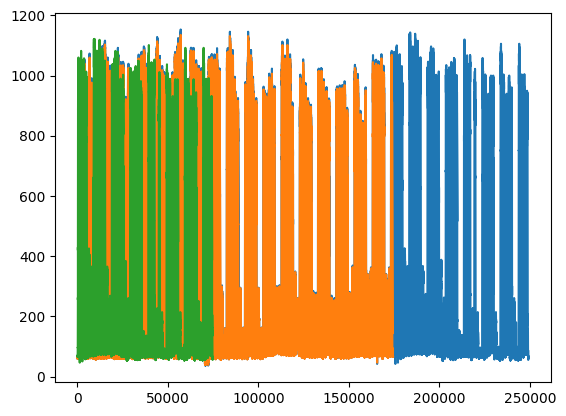

In [21]:
look_back=100

tr_Predplot =np.empty_like(df2)
tr_Predplot[:,:]=np.nan
tr_Predplot[look_back:len(tr_predict)+look_back,:] = tr_predict

te_Predplot =np.empty_like(df2)
te_Predplot[:,:]=np.nan
te_Predplot[look_back:len(te_predict)+look_back,:] = te_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(tr_Predplot)
plt.plot(te_Predplot)
plt.show()

In [22]:
len(te_df)-1036

74736

In [23]:
X_inp = te_df[74736: ].reshape(1,-1)

In [24]:
X_inp.shape

(1, 1036)

In [25]:
temp_inp = list(X_inp)
temp_inp =temp_inp[0].tolist()

In [26]:
temp_inp

[0.30822525719611427,
 0.31902928630318667,
 0.3165343943793239,
 0.3278029895687708,
 0.3277456357314406,
 0.3356231852887407,
 0.36278166111051363,
 0.3830089256909345,
 0.3849302792414954,
 0.4213600028676918,
 0.4520027243072731,
 0.4512872351865792,
 0.4513044413377782,
 0.4500584292217801,
 0.4488626017134459,
 0.45373624404057783,
 0.4446571315912105,
 0.47147291823493553,
 0.4968821020181381,
 0.4969638312363336,
 0.5008782306341183,
 0.49733519733304643,
 0.5081005125999211,
 0.5173760619421442,
 0.5174033050148762,
 0.5174577911603397,
 0.4942653331899487,
 0.511920278166111,
 0.5230885041402301,
 0.5245897408323476,
 0.5248664730974657,
 0.5633394271785497,
 0.5530888626017134,
 0.5435953686776355,
 0.5460400759938344,
 0.5436226117503673,
 0.5630512241459655,
 0.5505997060615836,
 0.5629006703229738,
 0.5177832741871886,
 0.5299666630820518,
 0.5069950173853819,
 0.5371444958239237,
 0.5327698318815643,
 0.5091214109043982,
 0.5091658601283292,
 0.5388679786356956,
 0.52425

In [27]:
lst_output=[]
n_steps=1036
i=0
while(i<10):

    if(len(temp_inp)>1036):
        #print(temp_input)
        X_inp=np.array(temp_inp[1:])
        print("{} day input {}".format(i,X_inp))
        X_inp=X_inp.reshape(1,-1)
        X_inp= X_inp.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_inp, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_inp.extend(yhat[0].tolist())
        temp_inp=temp_inp[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_inp = X_inp.reshape((1, n_steps,1))
        yhat = model.predict(X_inp, verbose=0)
        print(yhat[0])
        temp_inp.extend(yhat[0].tolist())
        print(len(temp_inp))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.0378416]
1037
1 day input [0.31902929 0.31653439 0.32780299 ... 0.02029609 0.04238879 0.0378416 ]
1 day output [[0.03551889]]
2 day input [0.31653439 0.32780299 0.32774564 ... 0.04238879 0.0378416  0.03551889]
2 day output [[0.0340984]]
3 day input [0.32780299 0.32774564 0.33562319 ... 0.0378416  0.03551889 0.0340984 ]
3 day output [[0.03318213]]
4 day input [0.32774564 0.33562319 0.36278166 ... 0.03551889 0.0340984  0.03318213]
4 day output [[0.0321106]]
5 day input [0.33562319 0.36278166 0.38300893 ... 0.0340984  0.03318213 0.0321106 ]
5 day output [[0.0310344]]
6 day input [0.36278166 0.38300893 0.38493028 ... 0.03318213 0.0321106  0.0310344 ]
6 day output [[0.03011302]]
7 day input [0.38300893 0.38493028 0.42136    ... 0.0321106  0.0310344  0.03011302]
7 day output [[0.02923759]]
8 day input [0.38493028 0.42136    0.45200272 ... 0.0310344  0.03011302 0.02923759]
8 day output [[0.02830961]]
9 day input [0.42136    0.45200272 0.45128724 ... 0.03011302 0.02923759 0.02830961]
9 day 

In [28]:
exam = pd.DataFrame({'Next_day_prediction': lst_output})

In [29]:
exam

,Next_day_prediction
0,[0.03784159570932388]
1,[0.035518892109394073]
2,[0.03409840166568756]
3,[0.03318212926387787]
4,[0.03211060166358948]
5,[0.031034395098686218]
6,[0.030113019049167633]
7,[0.029237590730190277]
8,[0.028309613466262817]
9,[0.02732892334461212]


In [30]:
df2

array([[0.02265763],
       [0.02207693],
       [0.02203391],
       ...,
       [0.02048966],
       [0.02029609],
       [0.04238879]])

In [35]:
day_new=np.arange(1,1037)
day_pred=np.arange(1037,1047)

In [36]:
day_new

array([   1,    2,    3, ..., 1034, 1035, 1036])

In [37]:
len(df2)-1037

248083

In [43]:
# plt.plot(day_new,scaler.inverse_transform(df2[248083:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [38]:
len(df2)

249120

In [39]:
df_3 =df2.tolist()
df_3.extend(lst_output)

In [41]:
print(type(df_3))

<class 'list'>


In [44]:
len(df_3)

249130

In [50]:
data ={'Actual': df2,
       'Predicted':df_3}

In [54]:
data

{'Actual': array([[0.02265763],
        [0.02207693],
        [0.02203391],
        ...,
        [0.02048966],
        [0.02029609],
        [0.04238879]]),
 'Predicted': [[0.02265763343728716],
  [0.022076925834319104],
  [0.02203391045632147],
  [0.021810230490733766],
  [0.021896261246729033],
  [0.02239093809370183],
  [0.022356525791303726],
  [0.02242104885830018],
  [0.02204681506972076],
  [0.02280101803061261],
  [0.023862064021220916],
  [0.02466215005197691],
  [0.025014876151557515],
  [0.02524285765494498],
  [0.02600566369143635],
  [0.023940925547549917],
  [0.02606875291249955],
  [0.02490877155249669],
  [0.025595583754525572],
  [0.025109509983152305],
  [0.0253174176434742],
  [0.023874968634620207],
  [0.023940925547549917],
  [0.02411298705954045],
  [0.02331720256658422],
  [0.02259167652435746],
  [0.02284976879234326],
  [0.023516507151306584],
  [0.023345879485249306],
  [0.022844033408610243],
  [0.023294261031652143],
  [0.023145141054593685],
  [0.0235537871